In [109]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as mpl
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve, auc
from sklearn.model_selection import GridSearchCV 
 

In [110]:
train=pd.read_csv("./downloads/mimic_icu_data.csv")


In [111]:
train.gender = train.gender.map(dict(M=1, F=0))

In [112]:
train = train.dropna()

In [113]:
train1 =train[[ 'age', 
  'gender', 
  'hospital_expire_flag', 
  'heartrate_mean',
  'sysbp_mean',
  'resprate_mean',
  'tempc_mean',
  'wbc_mean',
  'platelet_min',
  'creatinine_max',
  'lactate_mean']].copy()

In [114]:
Test= train[[ 'age', 
  'gender', 
  'heartrate_mean',
  'sysbp_mean',
  'resprate_mean',
  'tempc_mean',
  'wbc_mean',
  'platelet_min',
  'creatinine_max',
  'lactate_mean']].copy()

In [115]:
X=train1
y=train1.hospital_expire_flag
X.drop(['hospital_expire_flag'],inplace=True,axis=1)

Xtest = Test

In [116]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1,stratify=y)

In [117]:
svm=SVC(kernel='linear',C=1,gamma='auto',random_state=1)

svm.fit(X_train,y_train)

SVC(C=1, gamma='auto', kernel='linear', random_state=1)

In [118]:
y_pred=svm.predict(X_test)

In [119]:
preds = svm.predict(X)
targs = y 
print("accuracy: ", metrics.accuracy_score(targs, preds))
print("precision: ", metrics.precision_score(targs, preds)) 
print("recall: ", metrics.recall_score(targs, preds))
print("f1: ", metrics.f1_score(targs, preds))
print("area under curve (auc): ", metrics.roc_auc_score(targs, preds))
train_preds = preds

accuracy:  0.8018867924528302
precision:  0.8421052631578947
recall:  0.16494845360824742
f1:  0.27586206896551724
area under curve (auc):  0.577887070840821


In [120]:
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

[[65  1]
 [18  1]]


In [121]:

y_train_pred = svm.decision_function(X_train)    
y_test_pred = svm.decision_function(X_test) 

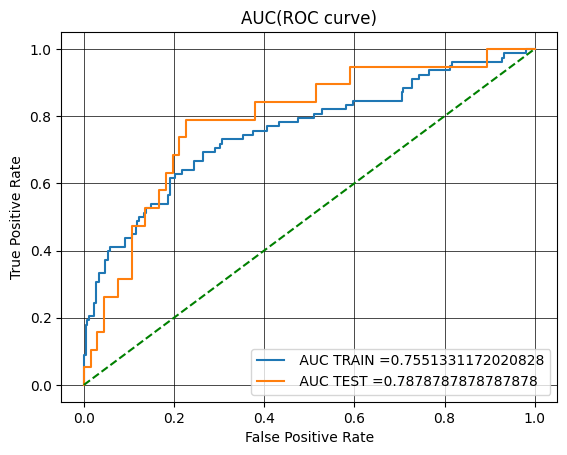

In [122]:
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.grid()

plt.plot(train_fpr, train_tpr, label=" AUC TRAIN ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label=" AUC TEST ="+str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1],'g--')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC(ROC curve)")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()